In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multi-class-object-detection-challenge/convert_preds_to_csv.py
/kaggle/input/multi-class-object-detection-challenge/Kaggle_3LC.ipynb
/kaggle/input/multi-class-object-detection-challenge/yolo_params.yaml
/kaggle/input/multi-class-object-detection-challenge/predict.py
/kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels/IMG_9300.txt
/kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels/IMG_9960.txt
/kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels/IMG_8710.txt
/kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels/000000010.txt
/kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels/IMG_9895.txt
/kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels/IMG_9270.txt
/kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels/000000007.txt
/kaggle/input/multi-class-object-detection-challenge/Starter_Datas

In [2]:
!pip install ultralytics 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 24.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninst

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path
import yaml

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
import random
import numpy as np
import torch

In [ ]:
seed = 42

In [ ]:
random.seed(seed)
np.random.seed(seed)  
torch.manual_seed(seed)

In [1]:
import os
train_count = len(os.listdir("/kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train/images"))

In [3]:
train_count

1000

In [5]:
data_dir = "/kaggle/input/multi-class-object-detection-challenge/Starter_Dataset"

In [6]:
train_images_count = len(os.listdir(f"{data_dir}/train/images"))
train_labels_count = len(os.listdir(f"{data_dir}/train/labels"))
val_images_count = len(os.listdir(f"{data_dir}/val/images"))

In [7]:
print(f"Training images: {train_images_count}")
print(f"Training labels: {train_labels_count}")
print(f"Validation images: {val_images_count}")

Training images: 1000
Training labels: 1000
Validation images: 95


In [8]:
data_config = {
    'path': '/kaggle/input/multi-class-object-detection-challenge/Starter_Dataset',
    'train': 'train/images',          
    'val': 'val/images',              
    'nc': 2,
    'names': ['cheerios', 'soup']
}

# Save configuration for this experiment
with open('baseline_data.yaml', 'w') as f:
    yaml.dump(data_config, f, default_flow_style=False)

In [9]:
model = YOLO("yolov8m.pt")

In [10]:
baseline_results = model.train(
    data='baseline_data.yaml',
    epochs=25,           
    batch=16,           
    imgsz=640,          
    device=0,           
    project='baseline_experiment',
    name='run1',
    
    # Key learning parameters
    verbose=True,       
    plots=True,         
    save=True,          
    
)

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=baseline_data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=run1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 64.5±48.3 MB/s, size: 5119.2 KB)


train: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train/labels... 1000 images, 57 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:20<00:00, 48.53it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.2±1.7 ms, read: 91.5±20.5 MB/s, size: 20471.7 KB)


val: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels... 95 images, 2 backgrounds, 0 corrupt: 100%|██████████| 95/95 [00:06<00:00, 15.46it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val is not writeable, cache not saved.


Plotting labels to baseline_experiment/run1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to baseline_experiment/run1
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.11G     0.5951      1.839     0.9685         14        640: 100%|██████████| 63/63 [01:09<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]

                   all         95        172      0.492      0.314      0.335      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.35G     0.7614     0.9942      1.034         16        640: 100%|██████████| 63/63 [00:53<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]

                   all         95        172      0.237      0.247      0.147      0.094



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.35G     0.8428     0.9368      1.066         10        640: 100%|██████████| 63/63 [00:53<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         95        172      0.609      0.171       0.17      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.27G     0.8017     0.8588      1.033         23        640: 100%|██████████| 63/63 [00:52<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         95        172      0.672      0.265       0.27      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.36G     0.7477     0.7864      1.035         16        640: 100%|██████████| 63/63 [00:52<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]

                   all         95        172      0.654      0.392      0.446      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      6.35G     0.7207     0.7257      1.004         14        640: 100%|██████████| 63/63 [00:52<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]

                   all         95        172      0.581       0.37       0.39      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.35G     0.6976     0.7095      1.005         14        640: 100%|██████████| 63/63 [00:52<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         95        172      0.569      0.418      0.439        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.27G     0.6604     0.6362     0.9874         18        640: 100%|██████████| 63/63 [00:52<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]

                   all         95        172      0.754      0.434      0.525      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.35G     0.5976     0.5664     0.9561         15        640: 100%|██████████| 63/63 [00:52<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         95        172      0.782      0.434       0.49      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.35G     0.5888     0.5609     0.9615         12        640: 100%|██████████| 63/63 [00:53<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         95        172      0.601      0.551      0.532       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.36G     0.5805     0.5445      0.949         18        640: 100%|██████████| 63/63 [00:52<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         95        172       0.69      0.588      0.632      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.27G     0.5599     0.5128     0.9429          9        640: 100%|██████████| 63/63 [00:52<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         95        172      0.781       0.56      0.632      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.35G     0.5538      0.487     0.9382         22        640: 100%|██████████| 63/63 [00:53<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all         95        172      0.789      0.521      0.609      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.35G     0.5103     0.4696     0.9237         11        640: 100%|██████████| 63/63 [00:53<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]

                   all         95        172        0.8       0.47      0.619      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.36G     0.5099      0.452     0.9206         15        640: 100%|██████████| 63/63 [00:52<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         95        172       0.72      0.477      0.497      0.382


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.27G      0.436     0.4082     0.8788          9        640: 100%|██████████| 63/63 [00:57<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all         95        172      0.835      0.554      0.648      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.36G     0.4427     0.4063     0.8962         11        640: 100%|██████████| 63/63 [00:52<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         95        172      0.716      0.554        0.6      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.35G     0.4429     0.4228     0.8732         10        640: 100%|██████████| 63/63 [00:53<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         95        172      0.713      0.501      0.551       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.37G     0.4151     0.3786     0.8822         10        640: 100%|██████████| 63/63 [00:52<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all         95        172       0.83      0.568      0.679      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.26G     0.4058     0.3532     0.8657         10        640: 100%|██████████| 63/63 [00:52<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]

                   all         95        172      0.741      0.615      0.669      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.35G     0.3758     0.3351     0.8538          7        640: 100%|██████████| 63/63 [00:52<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         95        172      0.837      0.474      0.599      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.36G     0.3705     0.3138     0.8534          8        640: 100%|██████████| 63/63 [00:52<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]

                   all         95        172      0.883      0.601      0.685      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.37G     0.3333     0.2915     0.8383          8        640: 100%|██████████| 63/63 [00:51<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         95        172      0.784      0.636      0.698      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.27G     0.3307     0.2864     0.8334          9        640: 100%|██████████| 63/63 [00:52<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         95        172      0.827      0.588      0.668      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.35G     0.3183     0.2703     0.8407         11        640: 100%|██████████| 63/63 [00:52<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         95        172      0.849      0.619      0.718      0.587



25 epochs completed in 0.406 hours.
Optimizer stripped from baseline_experiment/run1/weights/last.pt, 52.0MB
Optimizer stripped from baseline_experiment/run1/weights/best.pt, 52.0MB

Validating baseline_experiment/run1/weights/best.pt...
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         95        172      0.849      0.619      0.718      0.587
              cheerios         88         88      0.777      0.739       0.78      0.614
                  soup         84         84       0.92        0.5      0.656       0.56
Speed: 0.2ms preprocess, 10.8ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to baseline_experiment/run1


In [15]:
res_dict = { key: value
             for key, value in baseline_results.results_dict.items() }

In [24]:
print(baseline_results.results_dict['metrics/mAP50(B)'])

0.717801733561526


In [21]:
baseline_map50 =  res_dict['metrics/mAP50(B)']
baseline_map50

0.717801733561526

In [18]:
baseline_metrics = {
    'experiment': 'baseline_yolov8m',
    'map50': res_dict['metrics/mAP50(B)'],
    'map50_95': res_dict['metrics/mAP50-95(B)'],
    'precision': res_dict['metrics/precision(B)'],
    'recall' : res_dict['metrics/recall(B)'],
    'fitness' : res_dict['fitness'],
    'epochs': 25,
    'batch_size': 16,
    'image_size': 640
}

# This creates our experimental log - professional practice
pd.DataFrame([baseline_metrics]).to_csv('experiment_log.csv', index=False)
print("💾 Baseline results logged for future comparison")

💾 Baseline results logged for future comparison


In [19]:
resolution_configs = [
    {'size': 512, 'batch': 20 }, #Faster training, lower memory
    {'size': 640, 'batch': 16},  #YOLO standard, our baseline
    {'size': 800, 'batch': 12}, #Higher detail, good for small objects
    {'size': 960, 'batch': 8 } #Maximum detail, expensive training
]

In [26]:
import time

In [28]:
resolution_results = []

for config in resolution_configs:
    print(f"\n🧪 Testing Resolution: {config['size']}px")
    
    
    start_time = time.time()
    
    model = YOLO("yolov8m.pt")
    results = model.train(
        data='baseline_data.yaml',
        epochs=15,  
        batch=config['batch'],
        imgsz=config['size'],
        device=0,
        project='resolution_experiment',
        name=f'resolution_{config["size"]}',
        verbose=False  # Less output for cleaner comparison
    )
    
    training_time = time.time() - start_time
    
    
    map50 = results.results_dict['metrics/mAP50(B)']
    
    
    improvement = ((map50 - baseline_map50) / baseline_map50) * 100
    
    result_record = {
        'resolution': config['size'],
        'batch_size': config['batch'],
        'map50': map50,
        'improvement_percent': improvement,
        'training_time_minutes': training_time / 60,
    }
    
    resolution_results.append(result_record)
    
    print(f"✅ Results: mAP@50 = {map50:.4f}")
    print(f"📈 Improvement vs baseline: {improvement:+.2f}%")
    print(f"⏱️  Training time: {training_time/60:.1f} minutes")


🧪 Testing Resolution: 512px
New https://pypi.org/project/ultralytics/8.3.175 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=20, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=baseline_data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=resolution_5122, nbs=64, nms=False,

train: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train/labels... 1000 images, 57 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:05<00:00, 170.44it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.9±2.8 ms, read: 530.0±260.5 MB/s, size: 20471.7 KB)


val: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels... 95 images, 2 backgrounds, 0 corrupt: 100%|██████████| 95/95 [00:02<00:00, 40.47it/s] 

WARNING ⚠️ val: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val is not writeable, cache not saved.


Plotting labels to resolution_experiment/resolution_5122/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to resolution_experiment/resolution_5122
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15       5.6G     0.6427      1.778     0.9386         35        512: 100%|██████████| 50/50 [01:06<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         95        172      0.475      0.493      0.451       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      6.55G     0.7653     0.9545      1.004         46        512: 100%|██████████| 50/50 [00:53<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all         95        172      0.011      0.184    0.00312    0.00221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      6.62G     0.8125      0.919       1.03         44        512: 100%|██████████| 50/50 [00:47<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]

                   all         95        172     0.0177     0.0179    0.00176    0.00129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      6.69G     0.8168     0.7979      1.024         44        512: 100%|██████████| 50/50 [00:49<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all         95        172      0.479      0.427      0.382      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      6.75G     0.7581     0.7681          1         38        512: 100%|██████████| 50/50 [00:49<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]


                   all         95        172      0.555      0.346      0.358      0.214
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      6.82G      0.678     0.6872     0.9542         19        512: 100%|██████████| 50/50 [00:52<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         95        172      0.696      0.419      0.468      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      6.89G     0.6849     0.6952      0.959         22        512: 100%|██████████| 50/50 [00:47<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]

                   all         95        172      0.492      0.351      0.351      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      6.96G     0.6245     0.6284     0.9269         23        512: 100%|██████████| 50/50 [00:49<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         95        172      0.635      0.537      0.544       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      7.02G     0.5986     0.5513     0.9074         23        512: 100%|██████████| 50/50 [00:48<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         95        172      0.742      0.472      0.615      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      7.09G     0.5584     0.5101     0.8889         23        512: 100%|██████████| 50/50 [00:47<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         95        172      0.703      0.609      0.653      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15       5.4G     0.5114     0.4852     0.8726         20        512: 100%|██████████| 50/50 [00:47<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         95        172       0.81      0.595      0.671      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      6.06G     0.4746     0.4322     0.8593         23        512: 100%|██████████| 50/50 [00:46<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         95        172      0.711      0.661      0.681      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      6.06G     0.4458     0.3868     0.8597         23        512: 100%|██████████| 50/50 [00:49<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         95        172      0.786      0.508      0.583      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      6.06G     0.4183     0.3658     0.8525         24        512: 100%|██████████| 50/50 [00:47<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         95        172      0.773      0.585      0.655      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      6.11G     0.3832     0.3331     0.8359         22        512: 100%|██████████| 50/50 [00:49<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         95        172      0.827      0.547      0.675      0.534



15 epochs completed in 0.228 hours.
Optimizer stripped from resolution_experiment/resolution_5122/weights/last.pt, 52.0MB
Optimizer stripped from resolution_experiment/resolution_5122/weights/best.pt, 52.0MB

Validating resolution_experiment/resolution_5122/weights/best.pt...
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         95        172      0.827      0.547      0.676      0.534
Speed: 0.1ms preprocess, 6.7ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to resolution_experiment/resolution_5122
✅ Results: mAP@50 = 0.6756
📈 Improvement vs baseline: -5.88%
⏱️  Training time: 14.3 minutes

🧪 Testing Resolution: 640px
New https://pypi.org/project/ultralytics/8.3.175 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=baseline_data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fr

train: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train/labels... 1000 images, 57 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:07<00:00, 137.83it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 418.8±217.6 MB/s, size: 20471.7 KB)


val: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels... 95 images, 2 backgrounds, 0 corrupt: 100%|██████████| 95/95 [00:02<00:00, 41.19it/s] 

WARNING ⚠️ val: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val is not writeable, cache not saved.


Plotting labels to resolution_experiment/resolution_640/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to resolution_experiment/resolution_640
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      6.69G     0.5951      1.839     0.9685         14        640: 100%|██████████| 63/63 [01:16<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]

                   all         95        172      0.492      0.314      0.335      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      6.49G     0.7716     0.9934       1.04         16        640: 100%|██████████| 63/63 [00:55<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         95        172      0.298     0.0874      0.063     0.0418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      6.42G     0.8342      0.926      1.057         10        640: 100%|██████████| 63/63 [00:53<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all         95        172      0.224      0.311      0.186      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      6.32G     0.7784     0.8029      1.016         23        640: 100%|██████████| 63/63 [00:55<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         95        172      0.696      0.445      0.519      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      6.42G     0.7001     0.7157       1.01         16        640: 100%|██████████| 63/63 [00:53<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]

                   all         95        172      0.675      0.493      0.559      0.361


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      6.43G     0.6536     0.7185      0.977          6        640: 100%|██████████| 63/63 [00:58<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         95        172      0.287       0.37      0.286      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      6.43G     0.6543     0.6746     0.9742          7        640: 100%|██████████| 63/63 [00:52<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all         95        172      0.763      0.452      0.554      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      6.34G     0.6291     0.6264      0.956          9        640: 100%|██████████| 63/63 [00:53<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         95        172      0.601      0.457      0.451      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      6.42G     0.5627      0.576     0.9315          9        640: 100%|██████████| 63/63 [00:52<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         95        172      0.743      0.507       0.59      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      6.43G     0.5284     0.5236     0.9163          8        640: 100%|██████████| 63/63 [00:53<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         95        172      0.726      0.471       0.56      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      6.44G     0.5003      0.473     0.9094          8        640: 100%|██████████| 63/63 [00:52<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         95        172      0.724      0.559      0.618      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      6.34G     0.4613     0.4254     0.8877          8        640: 100%|██████████| 63/63 [00:52<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         95        172      0.771       0.52       0.61      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      6.42G     0.4308       0.39     0.8767         10        640: 100%|██████████| 63/63 [00:52<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         95        172      0.756      0.489      0.594       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      6.42G     0.3998     0.3666     0.8643          8        640: 100%|██████████| 63/63 [00:52<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         95        172      0.803      0.575      0.686      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      6.42G     0.3626     0.3247     0.8518         12        640: 100%|██████████| 63/63 [00:51<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         95        172      0.835      0.553       0.68      0.545



15 epochs completed in 0.250 hours.
Optimizer stripped from resolution_experiment/resolution_640/weights/last.pt, 52.0MB
Optimizer stripped from resolution_experiment/resolution_640/weights/best.pt, 52.0MB

Validating resolution_experiment/resolution_640/weights/best.pt...
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         95        172      0.834      0.553      0.681      0.546
Speed: 0.2ms preprocess, 10.5ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to resolution_experiment/resolution_640
✅ Results: mAP@50 = 0.6808
📈 Improvement vs baseline: -5.16%
⏱️  Training time: 15.7 minutes

🧪 Testing Resolution: 800px
New https://pypi.org/project/ultralytics/8.3.175 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=baseline_data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fr

train: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train/labels... 1000 images, 57 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:10<00:00, 95.01it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 269.5±87.3 MB/s, size: 20471.7 KB)


val: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels... 95 images, 2 backgrounds, 0 corrupt: 100%|██████████| 95/95 [00:02<00:00, 38.12it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val is not writeable, cache not saved.


Plotting labels to resolution_experiment/resolution_800/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
Image sizes 800 train, 800 val
Using 4 dataloader workers
Logging results to resolution_experiment/resolution_800
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15       7.8G      0.581      1.875     0.9683          6        800: 100%|██████████| 84/84 [01:14<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all         95        172      0.505      0.394      0.267      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      7.12G      0.746      1.064      1.053         11        800: 100%|██████████| 84/84 [01:01<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all         95        172      0.132      0.163     0.0683     0.0467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      7.63G     0.8329      1.014      1.102         12        800: 100%|██████████| 84/84 [01:00<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all         95        172      0.563      0.213      0.252       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      7.23G     0.7893      0.876      1.068          8        800: 100%|██████████| 84/84 [01:00<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         95        172      0.218      0.251      0.153        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15       7.3G     0.7168     0.8317      1.032          8        800: 100%|██████████| 84/84 [01:00<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all         95        172      0.689      0.454      0.513      0.346


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      7.69G     0.6341     0.7441      0.987          2        800: 100%|██████████| 84/84 [01:05<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all         95        172      0.684      0.392      0.499      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      7.27G     0.6342     0.7319     0.9839          4        800: 100%|██████████| 84/84 [01:00<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all         95        172      0.691      0.293      0.352      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      7.34G     0.6355     0.7028     0.9878          5        800: 100%|██████████| 84/84 [01:01<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all         95        172      0.726      0.376       0.42      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      7.41G     0.5583     0.6044     0.9311          5        800: 100%|██████████| 84/84 [01:00<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all         95        172      0.612      0.572      0.556      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      7.12G     0.5191     0.5515     0.9211          4        800: 100%|██████████| 84/84 [00:59<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all         95        172      0.804      0.595      0.674      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      7.63G     0.4803     0.4763     0.9084          4        800: 100%|██████████| 84/84 [00:59<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all         95        172      0.777      0.596      0.675      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      7.27G     0.4354      0.463     0.8874          4        800: 100%|██████████| 84/84 [01:00<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all         95        172      0.841      0.572       0.67      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      7.33G     0.4112     0.3964     0.8778          6        800: 100%|██████████| 84/84 [00:59<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all         95        172      0.875      0.544      0.688      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15       7.4G       0.38     0.3764     0.8574          5        800: 100%|██████████| 84/84 [01:00<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all         95        172      0.827       0.61      0.675      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      7.18G      0.353      0.353      0.846          6        800: 100%|██████████| 84/84 [01:00<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all         95        172      0.805      0.607      0.651      0.526



15 epochs completed in 0.276 hours.
Optimizer stripped from resolution_experiment/resolution_800/weights/last.pt, 52.0MB
Optimizer stripped from resolution_experiment/resolution_800/weights/best.pt, 52.0MB

Validating resolution_experiment/resolution_800/weights/best.pt...
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         95        172      0.875      0.544      0.688      0.532
Speed: 0.4ms preprocess, 16.3ms inference, 0.0ms loss, 5.4ms postprocess per image
Results saved to resolution_experiment/resolution_800
✅ Results: mAP@50 = 0.6885
📈 Improvement vs baseline: -4.09%
⏱️  Training time: 17.4 minutes

🧪 Testing Resolution: 960px
New https://pypi.org/project/ultralytics/8.3.175 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=baseline_data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fra

train: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train/labels... 1000 images, 57 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:08<00:00, 118.70it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 436.0±259.7 MB/s, size: 20471.7 KB)


val: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels... 95 images, 2 backgrounds, 0 corrupt: 100%|██████████| 95/95 [00:02<00:00, 39.88it/s] 

WARNING ⚠️ val: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val is not writeable, cache not saved.


Plotting labels to resolution_experiment/resolution_960/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 960 train, 960 val
Using 4 dataloader workers
Logging results to resolution_experiment/resolution_960
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      7.43G     0.5899      1.881     0.9729         13        960: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]

                   all         95        172      0.539      0.472       0.47      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      7.04G     0.7877      1.115      1.084         20        960: 100%|██████████| 125/125 [01:16<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all         95        172     0.0198      0.218    0.00403    0.00225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      7.11G     0.8454      1.229      1.111         18        960: 100%|██████████| 125/125 [01:16<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]

                   all         95        172      0.581      0.521      0.478      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      6.99G     0.7764     0.9618      1.068         17        960: 100%|██████████| 125/125 [01:15<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]

                   all         95        172      0.515        0.3      0.289      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      7.13G     0.7363     0.9202      1.054         14        960: 100%|██████████| 125/125 [01:15<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]

                   all         95        172      0.587      0.313      0.321      0.221


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      7.19G     0.6802     0.8392      1.016          5        960: 100%|██████████| 125/125 [01:20<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.70it/s]

                   all         95        172      0.617       0.44      0.465      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      7.18G     0.6424      0.755     0.9828          7        960: 100%|██████████| 125/125 [01:15<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.50it/s]

                   all         95        172      0.596      0.497      0.524      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15       7.2G     0.6036     0.6826     0.9757          9        960: 100%|██████████| 125/125 [01:15<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]

                   all         95        172      0.748      0.517      0.623       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      7.17G     0.5883     0.6493     0.9626          9        960: 100%|██████████| 125/125 [01:15<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]

                   all         95        172      0.742      0.442       0.53      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      7.19G     0.5451     0.5847      0.925          8        960: 100%|██████████| 125/125 [01:14<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]

                   all         95        172      0.674      0.525      0.533      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      7.17G     0.4848     0.5311     0.9078          8        960: 100%|██████████| 125/125 [01:15<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.70it/s]

                   all         95        172      0.749      0.545      0.617      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      7.17G     0.4341     0.4957     0.8866          7        960: 100%|██████████| 125/125 [01:16<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]

                   all         95        172      0.827       0.62      0.704      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      7.13G     0.3927     0.4138      0.868         10        960: 100%|██████████| 125/125 [01:15<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.67it/s]

                   all         95        172      0.857      0.619      0.722      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      7.18G     0.3723     0.3872      0.866          8        960: 100%|██████████| 125/125 [01:15<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]

                   all         95        172      0.894      0.554      0.678      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      7.18G     0.3361     0.3475     0.8425         13        960: 100%|██████████| 125/125 [01:15<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]

                   all         95        172      0.836       0.66      0.728      0.594



15 epochs completed in 0.339 hours.
Optimizer stripped from resolution_experiment/resolution_960/weights/last.pt, 52.1MB
Optimizer stripped from resolution_experiment/resolution_960/weights/best.pt, 52.1MB

Validating resolution_experiment/resolution_960/weights/best.pt...
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:14<00:00,  2.45s/it]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         95        172      0.841      0.656      0.728      0.594
Speed: 0.4ms preprocess, 19.3ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to resolution_experiment/resolution_960
✅ Results: mAP@50 = 0.7278
📈 Improvement vs baseline: +1.39%
⏱️  Training time: 21.2 minutes


In [29]:
resolution_results

[{'resolution': 512,
  'batch_size': 20,
  'map50': 0.675611558826489,
  'improvement_percent': -5.877691953417473,
  'training_time_minutes': 14.349981037775676},
 {'resolution': 640,
  'batch_size': 16,
  'map50': 0.6807884276417785,
  'improvement_percent': -5.156480430340856,
  'training_time_minutes': 15.71753652493159},
 {'resolution': 800,
  'batch_size': 12,
  'map50': 0.6884785755127709,
  'improvement_percent': -4.085133356151424,
  'training_time_minutes': 17.35462270975113},
 {'resolution': 960,
  'batch_size': 8,
  'map50': 0.7277680826193522,
  'improvement_percent': 1.3884543031647567,
  'training_time_minutes': 21.19701505502065}]

In [30]:
results_df = pd.DataFrame(resolution_results)

print("🔍 Resolution Experiment Results Summary:")
print(results_df.to_string(index=False))

🔍 Resolution Experiment Results Summary:
 resolution  batch_size    map50  improvement_percent  training_time_minutes
        512          20 0.675612            -5.877692              14.349981
        640          16 0.680788            -5.156480              15.717537
        800          12 0.688479            -4.085133              17.354623
        960           8 0.727768             1.388454              21.197015


In [32]:
optimal_resolution = int(results_df.loc[results_df['efficiency_score'].idxmax(), 'resolution'])


KeyError: 'efficiency_score'

In [ ]:
optimal_resolution = int(resolution_df.loc[resolution_df['efficiency_score'].idxmax(), 'resolution'])


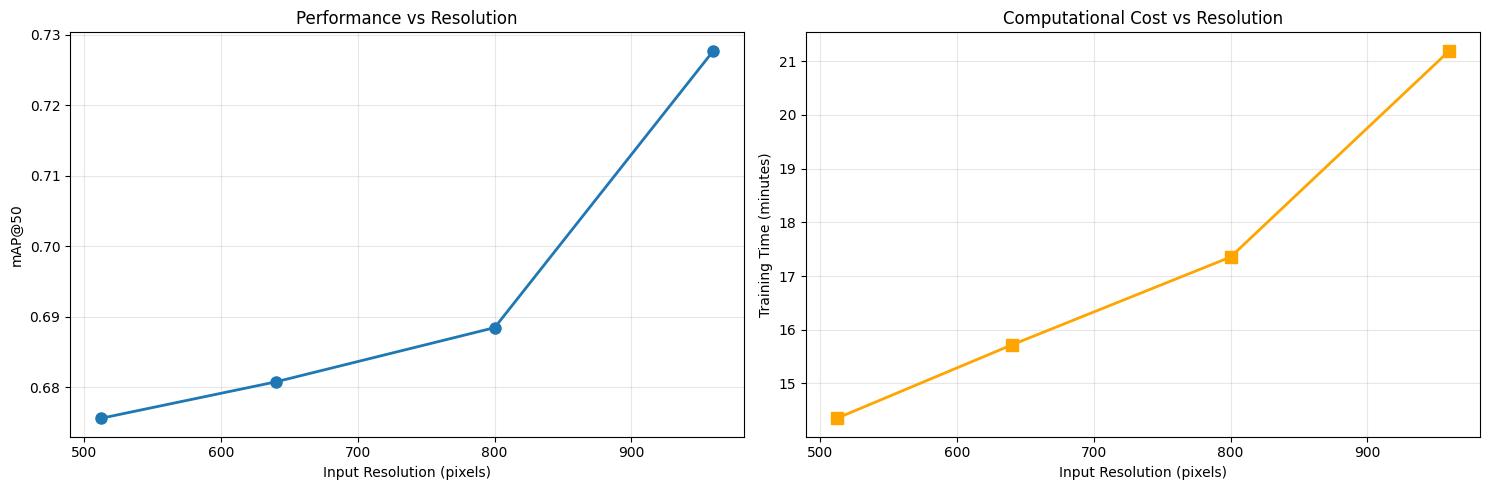


🎯 Optimal Resolution Analysis:
Best performance: 960px
Best efficiency: 960.0px
Recommended choice: 960.0px
Reasoning: Best balance of performance (+1.4%) and speed


In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Performance vs Resolution
ax1.plot(results_df['resolution'], results_df['map50'], 'o-', linewidth=2, markersize=8)
ax1.set_xlabel('Input Resolution (pixels)')
ax1.set_ylabel('mAP@50')
ax1.set_title('Performance vs Resolution')
ax1.grid(True, alpha=0.3)

# Training Time vs Resolution  
ax2.plot(results_df['resolution'], results_df['training_time_minutes'], 's-', 
         color='orange', linewidth=2, markersize=8)
ax2.set_xlabel('Input Resolution (pixels)')
ax2.set_ylabel('Training Time (minutes)')
ax2.set_title('Computational Cost vs Resolution')
ax2.grid(True, alpha=0.3)

plt.tight_layout()

plt.show()

# Find the optimal resolution based on performance-cost tradeoff
results_df['efficiency_score'] = results_df['improvement_percent'] / results_df['training_time_minutes']
optimal_idx = results_df['efficiency_score'].idxmax()
optimal_config = results_df.iloc[optimal_idx]

print(f"\n🎯 Optimal Resolution Analysis:")
print(f"Best performance: {results_df.loc[results_df['map50'].idxmax(), 'resolution']}px")
print(f"Best efficiency: {optimal_config['resolution']}px")
print(f"Recommended choice: {optimal_config['resolution']}px")
print(f"Reasoning: Best balance of performance ({optimal_config['improvement_percent']:+.1f}%) and speed")

In [34]:
optimal_resolution = int(results_df.loc[results_df['efficiency_score'].idxmax(), 'resolution'])


In [35]:
optimal_resolution

960

In [38]:
augmentation_strategies = [
    {
        'name': 'conservative', # Minimal changes, preserve original data characteristics
        'params': {
            'hsv_h': 0.01, 'hsv_s': 0.3, 'hsv_v': 0.3,
            'fliplr': 0.5, 'flipud': 0.0,
            'translate': 0.05, 'scale': 0.3, 'shear': 0.01,
            'mixup': 0.0, 'copy_paste': 0.0
        }
    },
    {
        'name': 'color_focused', # Emphasize color variations - key for synthetic-to-real
        'params': {
            'hsv_h': 0.05, 'hsv_s': 0.7, 'hsv_v': 0.5,  # Strong color variation
            'fliplr': 0.5, 'flipud': 0.1,
            'translate': 0.1, 'scale': 0.4, 'shear': 0.02,
            'mixup': 0.15, 'copy_paste': 0.1  # Advanced augmentations
        }
    },
    {
        'name': 'geometric_focused', #        Emphasize spatial variations and object positioning
        'params': {
            'hsv_h': 0.02, 'hsv_s': 0.4, 'hsv_v': 0.4,
            'fliplr': 0.6, 'flipud': 0.3,  # More flips
            'translate': 0.2, 'scale': 0.6, 'shear': 0.05,  # Strong geometric changes
            'mixup': 0.2, 'copy_paste': 0.15
        }
    },
    {
        'name': 'aggressive', #   Maximum augmentation - test limits of generalization
        'params': {
            'hsv_h': 0.08, 'hsv_s': 1.0, 'hsv_v': 0.8,  # Very strong color changes
            'fliplr': 0.7, 'flipud': 0.4,
            'translate': 0.25, 'scale': 0.8, 'shear': 0.08,
            'mixup': 0.3, 'copy_paste': 0.2
        }
    }
]

In [40]:
augmentation_results = []

for strategy in augmentation_strategies:
    print(f"\n🧪 Testing Strategy: {strategy['name'].upper()}")

    
    model = YOLO("yolov8m.pt")
    
    # Use optimal resolution from previous experiment
    training_params = {
        'data': 'baseline_data.yaml',
        'epochs': 30,  
        'batch': 12,   
        'imgsz': optimal_resolution,
        'device': 0,
        'project': 'augmentation_experiment',
        'name': strategy['name'],
        'patience': 50, 
        'verbose': False
    }
    

    training_params.update(strategy['params'])
    
    results = model.train(**training_params)
    
    # Extract comprehensive results
    map50 = results.results_dict['metrics/mAP50(B)']
    map50_95 = results.results_dict['metrics/mAP50-95(B)']
    
    result_record = {
        'strategy': strategy['name'],

        'map50': map50,
        'map50_95': map50_95,
        'improvement_vs_baseline': ((map50 - baseline_map50) / baseline_map50) * 100
    }
    
    # Add key parameters for analysis
    result_record.update({f'param_{k}': v for k, v in strategy['params'].items()})
    
    augmentation_results.append(result_record)
    
    print(f"✅ mAP@50: {map50:.4f}")
    print(f"📈 Improvement: {result_record['improvement_vs_baseline']:+.2f}%")


🧪 Testing Strategy: CONSERVATIVE
New https://pypi.org/project/ultralytics/8.3.175 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=baseline_data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.01, hsv_s=0.3, hsv_v=0.3, imgsz=960, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=conservative2, nbs=64, nms=Fals

train: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train/labels... 1000 images, 57 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:04<00:00, 213.89it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.9±1.1 ms, read: 569.1±224.5 MB/s, size: 20471.7 KB)


val: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels... 95 images, 2 backgrounds, 0 corrupt: 100%|██████████| 95/95 [00:02<00:00, 33.55it/s] 

WARNING ⚠️ val: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val is not writeable, cache not saved.


Plotting labels to augmentation_experiment/conservative2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
Image sizes 960 train, 960 val
Using 4 dataloader workers
Logging results to augmentation_experiment/conservative2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30        11G     0.5902      2.199      1.017          6        960: 100%|██████████| 84/84 [01:23<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all         95        172      0.161      0.254      0.108     0.0667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      10.1G     0.7996        1.3      1.128          9        960: 100%|██████████| 84/84 [01:14<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all         95        172      0.274      0.142      0.115     0.0502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      10.2G     0.8656      1.254      1.189         12        960: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         95        172      0.474      0.219      0.137     0.0769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      10.2G     0.8577      1.078      1.163          8        960: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all         95        172      0.564      0.289        0.3      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      10.1G     0.8086     0.9557      1.148          9        960: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all         95        172      0.635      0.492      0.516      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      10.1G     0.7658     0.8306      1.111          5        960: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         95        172      0.499      0.246      0.254      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      10.1G     0.7296     0.8232      1.087         10        960: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all         95        172      0.563      0.513       0.52      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      10.1G      0.665     0.7323      1.044          8        960: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all         95        172      0.661      0.449      0.498      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      10.2G     0.6077     0.6483      1.016         11        960: 100%|██████████| 84/84 [01:14<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all         95        172      0.691      0.496      0.502      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      10.1G      0.603      0.633      1.012          7        960: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all         95        172      0.705      0.356      0.382      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      10.1G     0.5857     0.6109     0.9949          8        960: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all         95        172      0.799      0.489      0.622      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      10.1G     0.5539     0.5961     0.9828          3        960: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all         95        172       0.67      0.572      0.598      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      10.1G     0.5258     0.5288     0.9747          5        960: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all         95        172      0.672      0.487      0.534      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      10.2G     0.5054     0.4889     0.9475         11        960: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all         95        172      0.779      0.467      0.575      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30        10G     0.4845     0.4681     0.9418          8        960: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all         95        172      0.824      0.422      0.514      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      10.1G      0.484     0.4777     0.9493          7        960: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all         95        172      0.879      0.503       0.67      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      10.1G     0.4501      0.439     0.9152          6        960: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all         95        172      0.751      0.574      0.666      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      10.1G     0.4477      0.415      0.929          9        960: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all         95        172      0.827      0.523      0.613      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      10.2G     0.4492     0.4236     0.9336          7        960: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all         95        172       0.75      0.637      0.748      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      10.1G     0.4324     0.4044     0.9179          8        960: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all         95        172      0.802      0.554      0.657      0.522


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      10.1G     0.3442     0.3393     0.8388          4        960: 100%|██████████| 84/84 [01:19<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all         95        172      0.764      0.565      0.642      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      10.1G     0.3369      0.348     0.8299          4        960: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all         95        172      0.684      0.629      0.673      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      10.1G     0.3202     0.3301     0.8342          4        960: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all         95        172      0.913      0.584      0.721       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      10.2G     0.3094     0.2905     0.8291          4        960: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all         95        172      0.817      0.576      0.691      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      10.1G     0.2884     0.2883     0.8228          5        960: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all         95        172      0.807      0.503      0.624        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      10.1G     0.2803     0.2689     0.8282          5        960: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all         95        172      0.856       0.54      0.688      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      10.1G     0.2729     0.2747     0.8209          2        960: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all         95        172      0.835      0.578      0.694      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      10.1G     0.2556     0.2365     0.8099          3        960: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all         95        172      0.805      0.618      0.706      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      10.2G     0.2494      0.236     0.8033          4        960: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all         95        172      0.761      0.573      0.685      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      10.1G     0.2348     0.2231     0.8045          6        960: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         95        172      0.699      0.655      0.689      0.574



30 epochs completed in 0.650 hours.
Optimizer stripped from augmentation_experiment/conservative2/weights/last.pt, 52.1MB
Optimizer stripped from augmentation_experiment/conservative2/weights/best.pt, 52.1MB

Validating augmentation_experiment/conservative2/weights/best.pt...
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         95        172      0.746      0.638      0.747      0.596
Speed: 0.3ms preprocess, 20.7ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to augmentation_experiment/conservative2
✅ mAP@50: 0.7473
📈 Improvement: +4.11%

🧪 Testing Strategy: COLOR_FOCUSED
New https://pypi.org/project/ultralytics/8.3.175 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=baseline_data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.1, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.05

train: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train/labels... 1000 images, 57 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:06<00:00, 146.71it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 512.2±265.8 MB/s, size: 20471.7 KB)


val: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels... 95 images, 2 backgrounds, 0 corrupt: 100%|██████████| 95/95 [00:02<00:00, 43.65it/s] 

WARNING ⚠️ val: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val is not writeable, cache not saved.


Plotting labels to augmentation_experiment/color_focused/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
Image sizes 960 train, 960 val
Using 4 dataloader workers
Logging results to augmentation_experiment/color_focused
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30        11G     0.5837      2.125      0.983          6        960: 100%|██████████| 84/84 [01:27<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all         95        172      0.277      0.458      0.188      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30        10G     0.8089      1.296      1.115         11        960: 100%|██████████| 84/84 [01:14<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all         95        172      0.354      0.236      0.225      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      10.1G     0.8768      1.195      1.142         10        960: 100%|██████████| 84/84 [01:15<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all         95        172      0.186      0.271      0.169     0.0982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      10.2G     0.8523      1.071       1.12          6        960: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all         95        172      0.649      0.319      0.417      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30        10G     0.7937     0.9603      1.086         12        960: 100%|██████████| 84/84 [01:14<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all         95        172      0.419       0.31      0.251      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      10.1G     0.7476     0.9344      1.059          9        960: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all         95        172      0.665      0.297      0.367      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      10.1G     0.7138     0.8817      1.059         17        960: 100%|██████████| 84/84 [01:14<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         95        172      0.761      0.444      0.493      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      10.1G     0.6975     0.7856      1.038          7        960: 100%|██████████| 84/84 [01:14<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all         95        172      0.636      0.406      0.447      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      10.2G     0.6492     0.7241      1.013         15        960: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all         95        172      0.701      0.279      0.329      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30        10G     0.6481     0.7276      1.013          3        960: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all         95        172      0.704      0.541      0.595      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      10.1G     0.5862     0.6536     0.9855         12        960: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         95        172      0.752      0.582       0.65      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      10.1G     0.5621     0.6079      0.968          7        960: 100%|██████████| 84/84 [01:14<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all         95        172      0.686      0.634      0.676      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      10.1G     0.5479     0.6117     0.9633         11        960: 100%|██████████| 84/84 [01:15<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all         95        172      0.716       0.64       0.68      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      10.2G     0.5351     0.5674      0.963         11        960: 100%|██████████| 84/84 [01:14<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all         95        172      0.827      0.609      0.746      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      10.1G     0.5092     0.5345     0.9451         13        960: 100%|██████████| 84/84 [01:14<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all         95        172      0.845      0.669       0.77      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      10.1G     0.4992      0.511     0.9422          8        960: 100%|██████████| 84/84 [01:15<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all         95        172      0.875      0.616      0.758      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      10.1G     0.4862     0.4918     0.9384          7        960: 100%|██████████| 84/84 [01:17<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all         95        172        0.8      0.597      0.661      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      10.1G     0.4579     0.4658     0.9163         11        960: 100%|██████████| 84/84 [01:15<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all         95        172      0.789      0.626      0.711      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      10.2G     0.4781     0.4718     0.9386          7        960: 100%|██████████| 84/84 [01:15<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all         95        172      0.852      0.627      0.741       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      10.1G     0.4441     0.4414     0.9244         14        960: 100%|██████████| 84/84 [01:14<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all         95        172      0.842      0.697      0.754      0.612


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      10.1G     0.3491     0.3609     0.8421          4        960: 100%|██████████| 84/84 [01:19<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all         95        172      0.855      0.651      0.754      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      10.1G     0.3413      0.377     0.8317          4        960: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all         95        172      0.857      0.611      0.716      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      10.1G     0.3369     0.3558     0.8337          3        960: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all         95        172      0.767      0.684      0.746       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      10.2G      0.323     0.3213     0.8247          4        960: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all         95        172       0.83      0.566       0.69      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30        10G     0.3155     0.3009      0.827          5        960: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all         95        172      0.838      0.623       0.73      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      10.1G     0.3015     0.3041     0.8265          5        960: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all         95        172      0.877      0.605      0.746      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      10.1G     0.2873      0.294     0.8288          2        960: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all         95        172      0.879      0.683      0.789      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      10.1G     0.2736      0.272      0.813          3        960: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all         95        172      0.891      0.638      0.793      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      10.2G     0.2672      0.258     0.8079          4        960: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all         95        172        0.9      0.667      0.788      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      10.1G     0.2473     0.2374     0.8087          6        960: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all         95        172      0.845      0.705      0.782      0.671



30 epochs completed in 0.661 hours.
Optimizer stripped from augmentation_experiment/color_focused/weights/last.pt, 52.1MB
Optimizer stripped from augmentation_experiment/color_focused/weights/best.pt, 52.1MB

Validating augmentation_experiment/color_focused/weights/best.pt...
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         95        172      0.893      0.638      0.793      0.675
Speed: 0.4ms preprocess, 21.8ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to augmentation_experiment/color_focused
✅ mAP@50: 0.7932
📈 Improvement: +10.50%

🧪 Testing Strategy: GEOMETRIC_FOCUSED
New https://pypi.org/project/ultralytics/8.3.175 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.15, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=baseline_data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.6, flipud=0.3, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_

train: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train/labels... 1000 images, 57 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:07<00:00, 129.39it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 432.6±261.3 MB/s, size: 20471.7 KB)


val: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels... 95 images, 2 backgrounds, 0 corrupt: 100%|██████████| 95/95 [00:02<00:00, 37.84it/s] 

WARNING ⚠️ val: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val is not writeable, cache not saved.


Plotting labels to augmentation_experiment/geometric_focused/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
Image sizes 960 train, 960 val
Using 4 dataloader workers
Logging results to augmentation_experiment/geometric_focused
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30        11G     0.6043      2.034     0.9939         11        960: 100%|██████████| 84/84 [01:31<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all         95        172      0.105       0.53      0.113     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      10.1G     0.8105      1.192      1.122          4        960: 100%|██████████| 84/84 [01:17<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all         95        172     0.0421     0.0455     0.0121    0.00588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      10.2G     0.8265      1.065      1.107         10        960: 100%|██████████| 84/84 [01:17<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all         95        172     0.0767       0.32     0.0481     0.0257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      10.2G     0.8328     0.9738      1.113          6        960: 100%|██████████| 84/84 [01:16<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all         95        172      0.134     0.0988      0.039     0.0228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      10.1G     0.7967     0.9257      1.092         18        960: 100%|██████████| 84/84 [01:15<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         95        172      0.706      0.282       0.35      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      10.1G     0.7466     0.8478      1.061          6        960: 100%|██████████| 84/84 [01:15<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all         95        172      0.661       0.52      0.578      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      10.1G     0.7167     0.7885      1.046          8        960: 100%|██████████| 84/84 [01:15<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all         95        172      0.751      0.402      0.481      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      10.1G     0.7077     0.7645      1.038          6        960: 100%|██████████| 84/84 [01:16<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all         95        172      0.732      0.549      0.649      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      10.2G     0.6536     0.7249      1.017         10        960: 100%|██████████| 84/84 [01:17<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all         95        172      0.821      0.587      0.686      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      10.1G     0.6278     0.6791      1.008          5        960: 100%|██████████| 84/84 [01:16<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all         95        172      0.736      0.401       0.57      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      10.1G     0.6184     0.6217     0.9875         16        960: 100%|██████████| 84/84 [01:16<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all         95        172      0.867      0.551      0.672      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      10.1G     0.5723     0.5835     0.9606          9        960: 100%|██████████| 84/84 [01:16<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all         95        172      0.838      0.685      0.751      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      10.1G     0.5535     0.5717     0.9596          5        960: 100%|██████████| 84/84 [01:16<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all         95        172      0.649      0.558      0.586      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      10.2G      0.541     0.5268     0.9546         14        960: 100%|██████████| 84/84 [01:17<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all         95        172      0.753      0.633      0.688       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      10.1G     0.5197     0.5091     0.9395         10        960: 100%|██████████| 84/84 [01:16<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all         95        172      0.752      0.666      0.693       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      10.1G      0.512      0.517     0.9426          9        960: 100%|██████████| 84/84 [01:15<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all         95        172      0.796      0.529      0.681      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      10.1G      0.506     0.4929     0.9565          7        960: 100%|██████████| 84/84 [01:16<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all         95        172      0.742      0.714      0.739      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      10.1G     0.5089     0.4934     0.9381          6        960: 100%|██████████| 84/84 [01:16<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all         95        172      0.699      0.512      0.621      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      10.2G     0.5076      0.478     0.9432          7        960: 100%|██████████| 84/84 [01:18<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all         95        172      0.734      0.573      0.686      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      10.1G     0.4843     0.4762     0.9293         13        960: 100%|██████████| 84/84 [01:16<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all         95        172       0.78      0.588       0.71       0.56


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      10.2G     0.3779     0.3849     0.8603          4        960: 100%|██████████| 84/84 [01:19<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all         95        172       0.72      0.626       0.69      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      10.1G      0.377     0.3961     0.8489          4        960: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all         95        172      0.825      0.477      0.622      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      10.1G     0.3604     0.3587     0.8532          3        960: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all         95        172      0.778      0.594      0.692      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      10.2G     0.3634     0.3422     0.8489          4        960: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all         95        172      0.804      0.628      0.737      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      10.1G     0.3469     0.3251     0.8437          5        960: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all         95        172      0.801      0.595      0.684       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      10.1G     0.3294     0.3158     0.8406          5        960: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all         95        172      0.831      0.621      0.728      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      10.1G     0.3095     0.3087     0.8389          2        960: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all         95        172      0.878      0.546      0.685      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      10.1G     0.3002     0.2797     0.8307          3        960: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all         95        172       0.84      0.606      0.737      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      10.2G      0.289     0.2707     0.8269          4        960: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all         95        172      0.831      0.627      0.738      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30        10G     0.2849      0.267     0.8301          6        960: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all         95        172      0.826       0.63      0.744      0.631



30 epochs completed in 0.671 hours.
Optimizer stripped from augmentation_experiment/geometric_focused/weights/last.pt, 52.1MB
Optimizer stripped from augmentation_experiment/geometric_focused/weights/best.pt, 52.1MB

Validating augmentation_experiment/geometric_focused/weights/best.pt...
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         95        172      0.826       0.63      0.744      0.631
Speed: 0.4ms preprocess, 20.3ms inference, 0.0ms loss, 5.7ms postprocess per image
Results saved to augmentation_experiment/geometric_focused
✅ mAP@50: 0.7441
📈 Improvement: +3.66%

🧪 Testing Strategy: AGGRESSIVE
New https://pypi.org/project/ultralytics/8.3.175 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.2, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=baseline_data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.7, flipud=0.4, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.0

train: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train/labels... 1000 images, 57 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:07<00:00, 130.67it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 482.0±222.4 MB/s, size: 20471.7 KB)


val: Scanning /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val/labels... 95 images, 2 backgrounds, 0 corrupt: 100%|██████████| 95/95 [00:02<00:00, 42.66it/s] 

WARNING ⚠️ val: Cache directory /kaggle/input/multi-class-object-detection-challenge/Starter_Dataset/val is not writeable, cache not saved.


Plotting labels to augmentation_experiment/aggressive/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
Image sizes 960 train, 960 val
Using 4 dataloader workers
Logging results to augmentation_experiment/aggressive
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30        11G     0.6857      2.234      1.004         11        960: 100%|██████████| 84/84 [01:34<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all         95        172      0.384      0.523      0.218      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30        10G     0.8796      1.374      1.111          7        960: 100%|██████████| 84/84 [01:18<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all         95        172      0.351      0.321      0.237      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      10.1G       0.95      1.421      1.158         11        960: 100%|██████████| 84/84 [01:16<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all         95        172      0.149      0.383     0.0965      0.058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      10.2G     0.9315      1.162      1.098         15        960: 100%|██████████| 84/84 [01:17<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all         95        172      0.597       0.29      0.345      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30        10G     0.8821      1.116      1.097         10        960: 100%|██████████| 84/84 [01:16<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all         95        172      0.535      0.424      0.403      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      10.1G     0.8409      1.054      1.069         13        960: 100%|██████████| 84/84 [01:19<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all         95        172      0.405      0.252      0.205      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      10.1G     0.7732     0.9427      1.037          9        960: 100%|██████████| 84/84 [01:19<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all         95        172      0.689      0.356      0.448      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      10.1G     0.7597     0.9014      1.035         11        960: 100%|██████████| 84/84 [01:17<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all         95        172      0.648      0.508      0.543      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      10.2G     0.7069     0.8215      1.026          6        960: 100%|██████████| 84/84 [01:19<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         95        172      0.688       0.53      0.588      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30        10G      0.702     0.8065          1         10        960: 100%|██████████| 84/84 [01:18<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all         95        172      0.725      0.669      0.687      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      10.2G     0.6823     0.7883     0.9979         16        960: 100%|██████████| 84/84 [01:18<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         95        172      0.695      0.583       0.63      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      10.1G     0.6556     0.7572     0.9821          7        960: 100%|██████████| 84/84 [01:19<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all         95        172      0.744       0.56      0.677      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      10.1G     0.6383     0.7212     0.9788          9        960: 100%|██████████| 84/84 [01:19<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all         95        172      0.791      0.621      0.715      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      10.2G     0.5952     0.6506      0.967          8        960: 100%|██████████| 84/84 [01:19<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all         95        172      0.845      0.541      0.677      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      10.1G     0.6091     0.6621      0.959         18        960: 100%|██████████| 84/84 [01:17<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all         95        172      0.681      0.687      0.711      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      10.2G     0.6007     0.6509     0.9559          8        960: 100%|██████████| 84/84 [01:19<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all         95        172      0.769      0.572      0.683      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      10.1G     0.5621     0.6203     0.9383         12        960: 100%|██████████| 84/84 [01:20<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all         95        172      0.729      0.622      0.684      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      10.1G     0.5334     0.5707     0.9336          4        960: 100%|██████████| 84/84 [01:17<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all         95        172      0.762      0.562      0.692      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      10.2G     0.5566     0.5802     0.9331         14        960: 100%|██████████| 84/84 [01:18<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all         95        172      0.743      0.671      0.703      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      10.1G     0.5359     0.5652     0.9288         11        960: 100%|██████████| 84/84 [01:18<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all         95        172      0.794      0.696      0.753      0.625


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      10.1G     0.4214     0.4925     0.8778          4        960: 100%|██████████| 84/84 [01:18<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         95        172      0.744      0.679      0.739       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      10.1G      0.433     0.4891     0.8755          4        960: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all         95        172      0.818      0.586      0.696       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      10.1G     0.4206      0.453     0.8799          3        960: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all         95        172      0.808      0.707      0.753      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      10.2G     0.4196     0.4307     0.8797          4        960: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all         95        172       0.85      0.672      0.789       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30        10G     0.4182      0.429     0.8816          4        960: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all         95        172       0.81      0.649       0.74      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      10.1G     0.3758     0.3908     0.8558          5        960: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all         95        172      0.828      0.715      0.782       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      10.1G     0.3671     0.3864     0.8595          2        960: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all         95        172      0.766      0.687      0.733      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      10.1G     0.3534     0.3637     0.8504          3        960: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all         95        172      0.819      0.714      0.774      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      10.2G     0.3538     0.3459     0.8567          4        960: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all         95        172      0.898      0.622      0.748      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      10.1G     0.3384     0.3411     0.8525          5        960: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         95        172      0.847      0.673      0.755      0.638



30 epochs completed in 0.684 hours.
Optimizer stripped from augmentation_experiment/aggressive/weights/last.pt, 52.1MB
Optimizer stripped from augmentation_experiment/aggressive/weights/best.pt, 52.1MB

Validating augmentation_experiment/aggressive/weights/best.pt...
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         95        172      0.818       0.71      0.775      0.654
Speed: 0.5ms preprocess, 22.0ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to augmentation_experiment/aggressive
✅ mAP@50: 0.7746
📈 Improvement: +7.92%


In [41]:
aug_df = pd.DataFrame(augmentation_results)

print("🎨 Augmentation Strategy Results:")
print(aug_df[['strategy', 'map50', 'improvement_vs_baseline']].to_string(index=False))

# Identify the best performing strategy
best_strategy = aug_df.loc[aug_df['map50'].idxmax()]

print(f"\n🏆 Best Augmentation Strategy: {best_strategy['strategy'].upper()}")
print(f"Performance: {best_strategy['map50']:.4f} mAP@50")
print(f"Improvement: {best_strategy['improvement_vs_baseline']:+.2f}%")


🎨 Augmentation Strategy Results:
         strategy    map50  improvement_vs_baseline
     conservative 0.747270                 4.105405
    color_focused 0.793196                10.503518
geometric_focused 0.744108                 3.664782
       aggressive 0.774629                 7.916884

🏆 Best Augmentation Strategy: COLOR_FOCUSED
Performance: 0.7932 mAP@50
Improvement: +10.50%


In [ ]:
print(f"\n🔍 Success Factor Analysis:")
print(f"Key parameters that drove success:")
param_analysis = {
    'Color variation (HSV)': f"H:{best_strategy['param_hsv_h']}, S:{best_strategy['param_hsv_s']}, V:{best_strategy['param_hsv_v']}",
    'Geometric changes': f"Translate:{best_strategy['param_translate']}, Scale:{best_strategy['param_scale']}",
    'Advanced techniques': f"MixUp:{best_strategy['param_mixup']}, Copy-Paste:{best_strategy['param_copy_paste']}"
}

for factor, values in param_analysis.items():
    print(f"• {factor}: {values}")